### 회귀
- 수치값 예측
- 선형회귀

In [63]:
#모듈로딩
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
#데이터 준비
hour = [6,3,4,2,8,5]
score = [100,80,70,50,96,87]
exam_df = pd.DataFrame({'hour':hour,'score':score})
exam_df


,hour,score
0,6,100
1,3,80
2,4,70
3,2,50
4,8,96
5,5,87


#### 시간에 따른 점수 예측
- 데이터 피쳐: hour
- 타겟 피쳐: exam_score

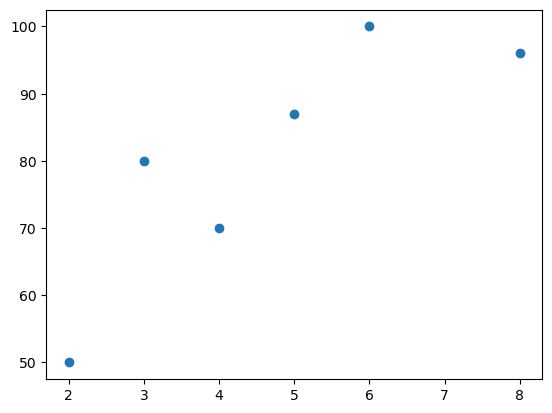

In [64]:
import matplotlib.pyplot as plt
plt.scatter(exam_df.hour, exam_df.score)

(array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

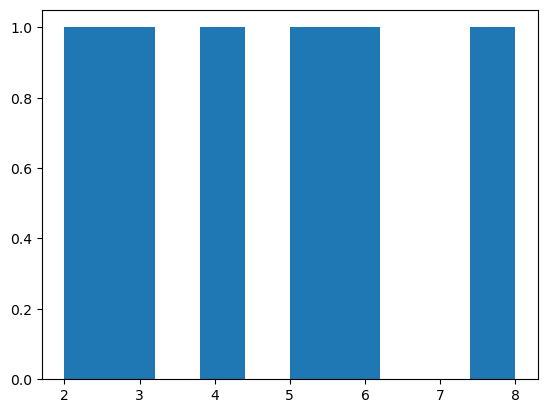

In [65]:
plt.hist(exam_df.hour, bins = 10)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
X_train = np.array(exam_df.hour).reshape(-1, 1)
y_train = np.array(exam_df.score).reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
#
print(f'모델 계수{model.coef_}')
print(f'모델 상수항{model.intercept_}')

X_test = np.array([2,7,8,0.5,5,7]).reshape(-1, 1)
y_test = np.array([80,90,90,60,98,87]).reshape(-1, 1)
def predict_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'mse: {mse}')
    print(f'rmse: {np.sqrt(mse)}')
    print(f'score: {r2_score(y_test, y_pred)}')
predict_model(model,X_test,y_test)


모델 계수[[7.24285714]]
모델 상수항[46.7]
mse: 175.42735544217692
rmse: 13.244899223556853
score: -0.2114684051253346


### 목표 시간과 과외횟수에 따른 점수예측
- 과외횟수 컬럼 추가
- 피쳐 : 시간, 과외횟수에 따른
- 타겟 : 점수

In [76]:
exam_df['cnt'] = [5,4,2,1,5,6]
exam_df

,hour,score,cnt
0,6,100,5
1,3,80,4
2,4,70,2
3,2,50,1
4,8,96,5
5,5,87,6


In [88]:
X = exam_df[['hour','cnt']]
y = exam_df.score
model2 = LinearRegression()
model2.fit(X,y)
model2.coef_, model2.intercept_
X_test = [[7,2],[2,3],[4,5],[3,4],[6,4],[3,2]]
y_test = [80,90,90,60,98,87]
predict_model(model2, X_test, y_test)

mse: 251.22402803014742
rmse: 15.85004820277047
score: -0.7349060059630359


c:\Users\dddf\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 회귀
- 데이터 보스턴
- 집값 예측

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

houseDate= fetch_california_housing()
CaliDF = pd.DataFrame(houseDate.data, columns= houseDate.feature_names)
CaliDF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
CaliDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
#타켓 라벨 데이터 확인(가격데이터)

houseDate.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

bostonDF = pd.read_csv('../dataset/boston.csv')
bostonDF

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
abs(bostonDF.corr().crim).sort_values(ascending=False)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
medv       0.388305
b          0.385064
dis        0.379670
age        0.352734
ptratio    0.289946
rm         0.219247
zn         0.200469
chas       0.055892
Name: crim, dtype: float64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

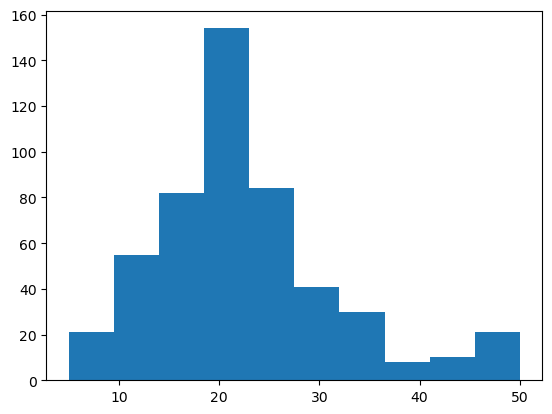

In [19]:
plt.hist(bostonDF.medv)

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <BarContainer object of 10 artists>)

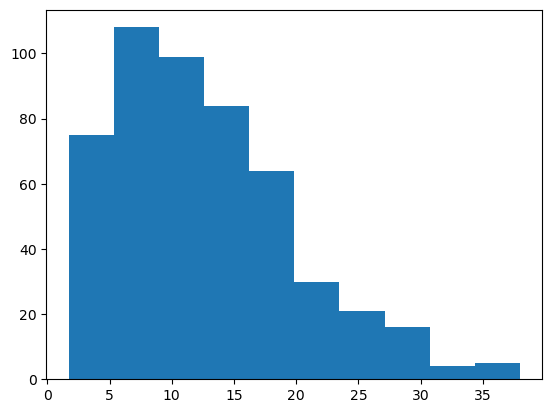

In [20]:
plt.hist(bostonDF.lstat)

#### 정규분포 확인 : 데이터의 분포가 치우쳐저 있는 모습

### 선형관계 여부
#### 타겟: 집가격 medv
#### 독립: lstat, rm, ptraito

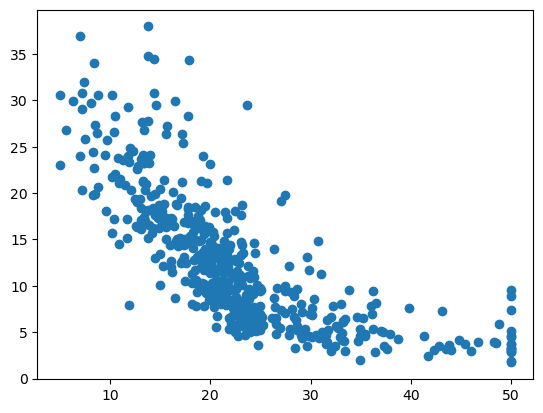

In [22]:
plt.scatter(bostonDF.medv, bostonDF.lstat)

### 선형관계 확인


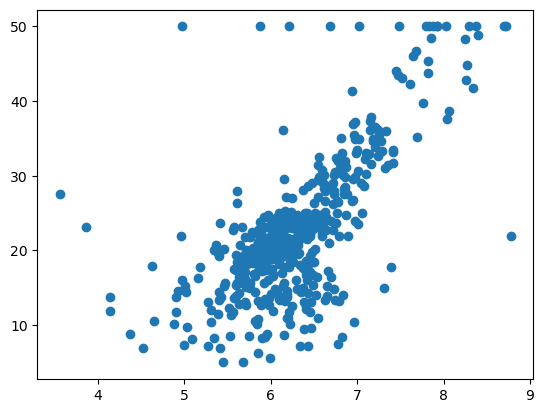

In [24]:
plt.scatter(bostonDF.rm,bostonDF.medv)

### 학습방법 선택 및 데이터 전처리
- 데이터 정제: 결측치,  이상치, 중복값, 모순값
- 데이터 변형: 수치형 -> 범주형(이산화), 수치형 -> 범위 Scale(정규화)

In [27]:
#결측치 체크
bostonDF.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
#모순값 또는 노이즈 체크
for col in bostonDF.columns:
    print(f'{col}')
    print(f'{bostonDF[col].unique}')   

### 학습용 데이터랑 테스트용 데이터 준비

In [48]:
from sklearn.model_selection import train_test_split
data = bostonDF.drop('medv', axis=1)
target = bostonDF['medv']
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=42)

### 학습 진행
- 학습모델 객체 생성
- 학습 진행 <- 학습용 데이터
- 모델 평가 <- 예측과 정답 비교

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
model.coef_, model.intercept_

(array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
        -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
         2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]),
 31.631084035692954)

### 평가
- predict() 예측값, 실제값 비교

In [41]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
print(f'MSE: {round(mean_squared_error(y_test, y_pred),2)}')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred),2)}')
print(f'R2: {round(r2_score(y_test, y_pred),2)}')


MSE: 21.52
MAE: 3.16
R2: 0.71


In [77]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
cross_val_model = cross_validate(model, X_train,y_train,scoring=['r2','neg_mean_squared_error'], cv=30,return_estimator=True)
Mse = -1*np.array(cross_val_model['test_neg_mean_squared_error'])
rmse = np.sqrt(Mse)
av_rmse= np.mean(rmse)
print(f'MSE: {Mse}')
print(f'RMSE: {rmse}')
print(f'Average RMSE: {av_rmse}')
# cross_val_model2
cross_val_model['test_r2']


MSE: [ 8.46691147 23.26309234 32.40111654 32.96417348 19.92905032 32.95021816
 75.38009889 50.18495875 11.68384416 14.37430708 12.48369645 28.8221026
 20.69341211 10.61203693 65.9219491  11.33896526 17.96481919 21.24975487
 25.39762357 17.84733302 17.34498536 20.50213257 18.67009501 12.70902021
 23.44610513  7.81870031 10.33261221 17.48076251 79.78205455 17.2163461 ]
RMSE: [2.90979578 4.8231828  5.69219787 5.7414435  4.46419649 5.74022806
 8.68217132 7.0841343  3.41816386 3.79134634 3.53322748 5.36862204
 4.54900122 3.25761215 8.11923328 3.36733801 4.23849256 4.60974564
 5.0396055  4.2246104  4.16473113 4.52792807 4.32089053 3.56497128
 4.84211784 2.7961939  3.21443809 4.18100018 8.93208008 4.1492585 ]
Average RMSE: 4.77826527286092


array([ 0.81826844,  0.7522221 ,  0.53050932,  0.71074526,  0.73299076,
        0.78566021,  0.16539537, -0.0984062 ,  0.73960153,  0.80510075,
        0.83812051,  0.74250829,  0.80629323,  0.91604636,  0.5105197 ,
        0.63929091,  0.84419702,  0.81690486,  0.84240489,  0.47621993,
        0.70434229,  0.67387444,  0.70528917,  0.70497312,  0.81492783,
        0.71823748,  0.7165232 ,  0.84578527,  0.1082609 ,  0.29822943])

### 과적합 해결법
- 다항회귀의 경우 속성피쳐가 늘어나 과적합의 위험이 발생
- 가중치의 규제를 가하는 정규화(regulatization)을 통해 해결
- L1 -> Ridge
- L2 -> Lasso
- L1+L2 -> Elastic Net